In [ ]:
import polars as pl
import numpy as np
import os
import matplotlib.pyplot as plt
import emd
from dtw import *
from utils import *
from plotters import *

Noisy signal to clean signal

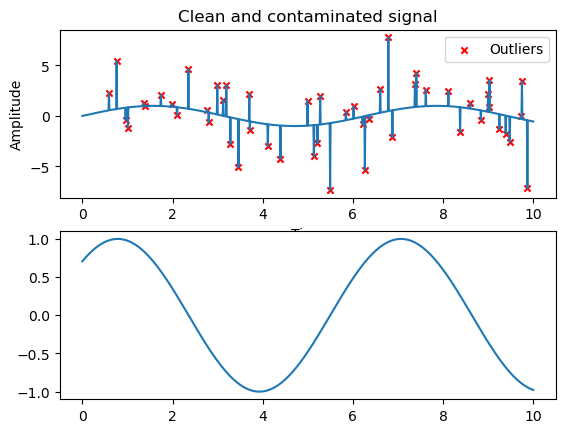

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate signal containing outliers
time = np.linspace(0, 10, 1000)
contaminated_signal = np.sin(time)
num_outliers = 50 # 5th bottom percentile of outliers
outliers_indices = np.random.choice(len(time), num_outliers, replace=False)
contaminated_signal[outliers_indices] += np.random.normal(0, 3, num_outliers)

# Generate clean, shifted signal
clean_signal = np.sin(time + np.pi / 4)

# Plot the signal with outliers
# plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)    
plt.plot(time, contaminated_signal)
plt.scatter(time[outliers_indices], contaminated_signal[outliers_indices], color='red', label='Outliers', marker='x', s=20)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Clean and contaminated signal')
plt.subplot(2, 1, 2)
plt.plot(time, clean_signal)
plt.show()